In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

# ----------------------------
# 1) load IMDB dataset
vocab_size = 20000
max_len = 200

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

# 2) pad sequences
X_train = pad_sequences(X_train, maxlen=max_len)
X_test  = pad_sequences(X_test,  maxlen=max_len)

# ----------------------------
# 3) build RNN model
model = Sequential([
    Embedding(vocab_size, 128, input_length=max_len),
    SimpleRNN(128),                     # THIS IS THE RNN LAYER
    Dense(1, activation='sigmoid')      # binary classification
])

# ----------------------------
# 4) compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 5) train
model.fit(X_train, y_train, epochs=1, batch_size=64, validation_split=0.2)

# 6) evaluate
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print("Test accuracy:", acc)

c:\Users\Hrishita\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


313/313 ━━━━━━━━━━━━━━━━━━━━ 52s 157ms/step - accuracy: 0.6506 - loss: 0.6058 - val_accuracy: 0.7664 - val_loss: 0.4828
Test accuracy: 0.7767199873924255


782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step


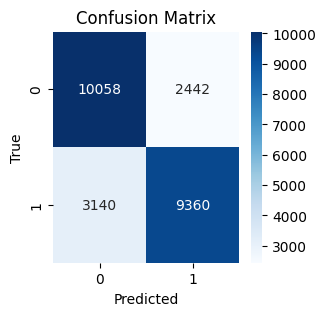

In [3]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

preds = (model.predict(X_test) > 0.5).astype(int)
cm = confusion_matrix(y_test, preds)

plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()